# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  
  The paper is about a part of data cleaning, data tidying. It consists of structuring datasets in a specfic way so that it is easy to use.
  
  2. Read the introduction. What is the "tidy data standard" intended to accomplish? 
  
  The tidy data stadard is meant to lay out a standard way to organize data so new projects doesn't start from scratch/without a framework.
  
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  
  3a. Tidy datasets are uniform and once you understand how to read the format, you can read all tidy data sets. Messy data sets do not huve a uniform structure and could vary wildly, possibly making it a challenge to read every data set.
  
  3b. Variables and observations are, at least, a partially abstract idea. When it is implemented it it much easier to explain than the general concept.
  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  
  Data sets are made of up values, that can be numbers or strings, and each value is part of a vairiable and observation. Observations contain values of one instance across the catagories (usually rows). Variables contain values of one form of measurement (usually columns).
  
  5. How is "Tidy Data" defined in section 2.3?
  
  Tidy Data is defined as "a standard way of mapping the meaning of a dataset to its structure" in section 2.3.
  
  
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  
  According to Tidy Data by Hadley Wickman the 5 most common problems with messy data are (1) column headers are values, not variable names, (2) multiple variables are stored in one column, (3) variables are stored in both rows and columns, (4) multiple types of observational units are stored in the same table, and (5) a single observational unit is stored in multiple tables. 
  Table 4's issue is that the column headers are values, when they should be variables.
  Melting a data set is turning rows in to cloumns. For each value in the where the cloumn header is a value, two cloumns are created, the value of the previous coulumn header and the value for that variable.
  
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  
  Table 11 has a column, "element", that has the names of two variables. Table 12 is molten since it was melted, and the missing values were dropped.
  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  
  The "chicken-and-egg" problem with tidy data is that implementing it is limited by the power of the tidy data tools. When using the tools, it can be an easy one time solution to slightly modify and keep going, rather than make larger changes that would improve effectivness over time.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

To clean the variable I deleted all commas, and converted the variable to an int. After I did this there were no NAs in the variable. I used .dtypes to identify what I was converting from


2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

I choose to combine all of the "Boat" values to one type of value. I converted all 5 NAs, "Questionable", "Unverified", and "Under Investigation" to be "Invalid" as it is already a large data group that represents data where an unknown factor/mistake was made in recording. This limits the possible values for the Type coloumn down to a reasonable amount, where each possible value represents a distinct piece of data.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

According to the Codebook there should be three possible values 1 (Not released), 0 (releashed), 9 (unclear). The values represented as 9 were changed to np.nan.

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `ImposedSentenceAllChargeInContactEvent` variable.) 

ImposedSentenceAllChargeInContactEvent contains a numerical value indicating how many months the sentance is. According to the codebook it will be blank if ImposedSentenceAllChargeInContactEvent equals 4 or 9. To clean the row I replaced any " " and "" with np.nan to better reresent the status of N/A.


In [2]:
import numpy as np
import pandas as pd

#part 1
#I had issues with importing used: https://medium.com/@anala007/dealing-with-the-unicodedecodeerror-in-pandas-when-reading-csv-files-edc4987bf68b
df_airbnb = pd.read_csv("./data/airbnb_NYC.csv", encoding='ISO-8859-1', low_memory = False)

#first issue is that price is an object
#source: https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python
df_airbnb['Price'] = df_airbnb['Price'].str.replace(',','').astype(int)

#source: https://www.statology.org/numpy-count-nan/
#print(np.count_nonzero(np.isnan(df_airbnb['Price'])))

#part2
df_sharks = pd.read_csv("./data/sharks.csv", encoding='ISO-8859-1', low_memory = False)
#print(df_sharks.dtypes)
#print(df_sharks['Type'].unique(), "\n")

#clean Type
#get rid of "Boatomg", convert "Boat" to "Boating"
df_sharks['Type'] = df_sharks['Type'].replace(("Boat", "Boatomg"),"Boating")

#combine "Uncomfirmed" and "Unverified"
#print(df_sharks['Type'].isnull().sum(),"\n")
#convert NANs to Invalid
df_sharks['Type'] = df_sharks['Type'].replace(("Unverified", "Unconfirmed",np.nan, "Questionable","Under investigation"), "Invalid")

#print(df_sharks['Type'].value_counts(), "\n")

#part 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df_trial = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
#df_trial.head()
#clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`
#print(df_trial['WhetherDefendantWasReleasedPretrial'].value_counts(), "\n")
#print(df_trial['WhetherDefendantWasReleasedPretrial'].isnull().sum(),"\n")
df_trial['WhetherDefendantWasReleasedPretrial'] = df_trial['WhetherDefendantWasReleasedPretrial'].replace(9,np.nan)
#print(df_trial['WhetherDefendantWasReleasedPretrial'].unique(), "\n")

#part 4
#clean the ImposedSentenceAllChargeInContactEvent, look at SentenceTypeAllChargesAtConvictionInContactEvent
df_trial.head()
#print(df_trial['ImposedSentenceAllChargeInContactEvent']) #initially object type, according to codebook it is measured in month -> should be ints

#print(df_trial['ImposedSentenceAllChargeInContactEvent'].dtypes)
#print(df_trial['ImposedSentenceAllChargeInContactEvent'].isnull().sum(),"\n")
#convert 9053 " " to NAs
df_trial['ImposedSentenceAllChargeInContactEvent'] = df_trial['ImposedSentenceAllChargeInContactEvent'].replace(("", " "),np.nan)
#print(df_trial['ImposedSentenceAllChargeInContactEvent'].value_counts(), "\n")
#print(df_trial['ImposedSentenceAllChargeInContactEvent'].isnull().sum(),"\n")
#ImposedSentenceAllChargeInContactEvent should be a number iff SentenceTypeAllChargesAtConvictionInContactEvent = 0, 1, or 2 since those are the only
#codes that indicate a sentance/ jail time
#print(df_trial['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(), "\n")
print(df_trial['ImposedSentenceAllChargeInContactEvent'].value_counts(), "\n")
print(df_trial['ImposedSentenceAllChargeInContactEvent'].isnull().sum(),"\n")



0                   4953
12                  1404
.985626283367556    1051
6                    809
3                    787
                    ... 
276                    1
49.9712525667351       1
22.4928131416838       1
40.1642710472279       1
12.394250513347        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64 

9053 



**Q3.** This question provides some practice doing exploratory data analysis and visualization. 

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations (rows) are there? What are the variables (cols) included? Use `.head()` to examine the first few rows of data.

The data contains 3798 observations (rows) and 63 variables (columns). There is a large number of variables that descrive statistics of different colleges. 


3. Cross tabulate `control` and `level`. Describe the patterns you see.

The most common type of college are 4-year Private not-for-profits, and the least common are 2-year Private not-for-profits. 

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

The institutions with the best graduation rates are Private not-for-profit accross both 4 and 2 year (note that there are signifigantly less 2 year Private not-for-profit)

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

With just the graphic it can be unclear which group has the best graduation. 4 year private not-for-profit stands out as having the most colleges with a slightly better graduation rate.

7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

The bi-model behavior can be explianed by 4 year private-not-for-profit having a higher aid-value on average compared to the other catagories.

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

The plot shows that as the amount of financial aid inncreases, so does the graduation rate. When grouping the data it becomes clear that 4 year universities offer more financial aid. This makes sense since they are longer programs. Additionally private not for profit universities offer the most fincail aid. This makes sense since public universities usually have a lower base tuition and for profit schools are after profit.

In [3]:
#part 1 and 2
df = pd.read_csv("./data/college_completion.csv", encoding='ISO-8859-1', low_memory = False)
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n')
df.head()

#part 3
pd.crosstab(df['control'], df['level'])


(3798, 63) 

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 



level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


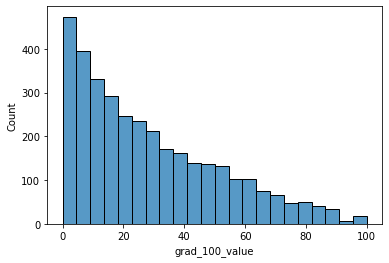

In [4]:
#part 4 - For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description
import seaborn as sns # Import Seaborn
p1 = sns.histplot(df['grad_100_value']) #histogram

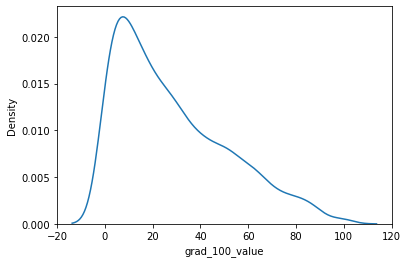

In [5]:
p2 = sns.kdeplot(df['grad_100_value']) #kernel density plot

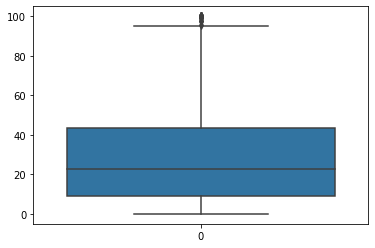

In [6]:
p3 = sns.boxplot(data = df['grad_100_value']) #boxplot

In [7]:
df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


AxesSubplot(0.125,0.125;0.775x0.755)


grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

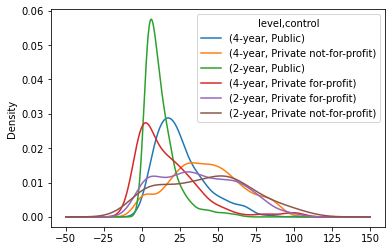

In [8]:
#part 5
#For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe`
#to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the 
#best graduation rates?
group_by = ['level','control']
group1= 'level'
group2 = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
p4 = df_wide.plot.density()
print(p4)
df.loc[:,[group1,group2,var]].groupby([group1, group2]).describe()


#The institutions with the best graduation rates are Private not-for-profit accross both 4 and 2 year (note that there are signifigantly less 2 year Private not-for-profit)

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

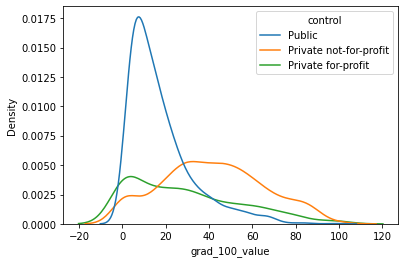

In [9]:
#in case the graphs were supposed to be seperate
sns.kdeplot(data=df, x='grad_100_value', hue='control') 


<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

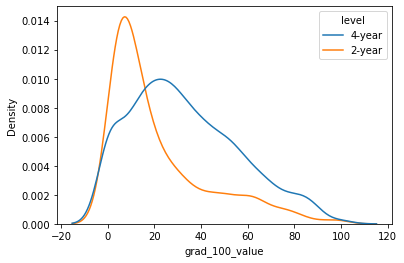

In [10]:
sns.kdeplot(data=df, x='grad_100_value', hue='level') 

<AxesSubplot:ylabel='Density'>

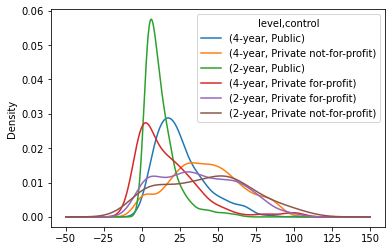

In [11]:
#part 6
#Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. 
#Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

df['levelXcontrol']=df['level']+', '+df['control']
group3 = 'levelXcontrol'
var = 'grad_100_value'
df_wide2 = df.pivot(columns=group_by,values=var)
df_wide2.plot.density()

#With just the graphic it can be unclear which group has the best graduation. 4 year private not-for-profit stands out as having the most colleges with a slightly better graduation rate.

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

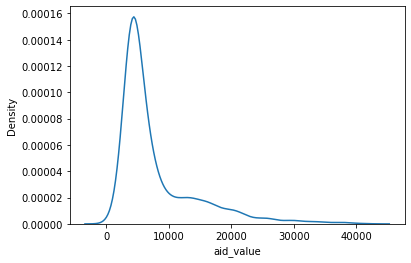

In [12]:
#part 7
#Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. 
#Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped
# calculations of statistical descriptions of `aid_value` by `level` and `control`.
sns.kdeplot(data=df, x='aid_value')

AxesSubplot(0.125,0.125;0.775x0.755)


aid_value                                     \
                                  count          mean          std     min   
level  control                                                               
2-year Private for-profit         464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit      68.0   5128.058824  2590.449946   934.0   
       Public                     926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit         527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit    1180.0  14702.401695  7649.775203   902.0   
       Public                     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

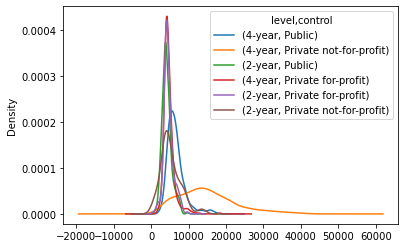

In [13]:
group_by = ['level','control']
group1= 'level'
group2 = 'control'
var = 'aid_value'
df_wide3 = df.pivot(columns=group_by,values=var)
p6 = df_wide3.plot.density()
print(p6)
df.loc[:,[group1,group2,var]].groupby([group1, group2]).describe()

#The bi-model behavior can be explianed by 4 year private-not-for-profit having a higher aid-value on average compared to the other catagories.

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

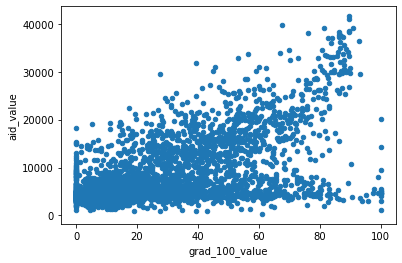

In [16]:
#8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. 
#Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

df.plot.scatter(y='aid_value',x='grad_100_value')

#The plot shows that as the amount of financial aid inncreases, so does the graduation rate.

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

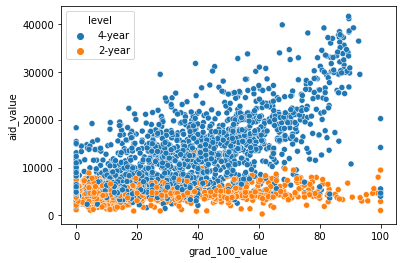

In [19]:
sns.scatterplot(data=df, y='aid_value',x='grad_100_value', hue='level')


<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

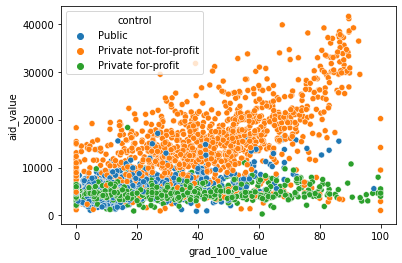

In [20]:
sns.scatterplot(data=df, y='aid_value',x='grad_100_value', hue='control')
#When grouping the data it becomes clear that 4 year universities offer more financial aid. This makes sense since they are longer programs. Additionally private not for profit universities offer the most fincail aid. This makes sense since public universities usually have a lower base tuition and for profit schools are after profit.

**Q4.** This question uses the Airbnb data to practice making visualizations. 

  1. Load the `./data/airbnb_NYC.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government. 

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have? 

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.